In [1]:
from sklearn import neighbors
import numpy as np
from sklearn.externals import joblib
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from scipy import interp
import matplotlib.pyplot

In [2]:
label = 0
label_train = []
for i in range(88):
    if i % 2 != 0:
        label += 1
    label_train.append(label)
label_train.pop(0)
label_train.append(44)
label_test = [24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 44, 44]

In [3]:
feature_training = joblib.load('feature_train.pkl')
feature_test = joblib.load('feature_test.pkl')
feature_training=np.array(feature_training,dtype='double')
feature_test=np.array(feature_test,dtype='double')

In [4]:
FeatureTrain=feature_training
FeatureTest=feature_test

In [4]:
feature_training2 = joblib.load('zfeature_train.pkl')
feature_test2 = joblib.load('zfeature_test.pkl')
feature_training2=np.array(feature_training2,dtype='double')
feature_test2=np.array(feature_test2,dtype='double')

In [22]:
head_train=feature_training[:,0:2].reshape(88,2)
head_test=feature_test[:,0:2].reshape(22,2)
bodyheight_train=feature_training[:,2].reshape(88,1)
bodyheight_test=feature_test[:,2].reshape(22,1)
type_train=feature_training[:,3].reshape(88,1)
type_test=feature_test[:,3].reshape(22,1)
shoulder_train=feature_training2[:,4].reshape(88,1)
shoulder_test=feature_test2[:,4].reshape(22,1)

In [62]:
FeatureTrain=np.concatenate((bodyheight_train,type_train), axis=1)
FeatureTest=np.concatenate((bodyheight_test,type_test), axis=1)

In [7]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(FeatureTrain, label_train)
predict = knn.predict(FeatureTest)
print(predict)

[24 24  8 25 26 43  9 27 28 41 29 29 30 30 31 31 32 19 33 15 44 44]


In [5]:
svm2 = svm.SVC()
svm2.fit(FeatureTrain, label_train)
predict = svm2.predict(FeatureTest)
print(predict)

[24 24  8  8 26 43  9 27 28 41 29 29 30 30 31 31 32 19 33 15 44 44]


C:\Users\zhaoq\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [66]:
probs = knn.predict_proba(feature_test)

ValueError: query data dimension must match training data dimension

In [8]:
correct = 0
sum=len(label_test)
for i in range(len(label_test)):
    if predict[i] ==label_test[i]:
        correct += 1

acc = correct / sum
print(acc)

0.7272727272727273


In [15]:
len(feature_training[0])

6

In [101]:
IntraClass_Var_List=[]
InterClass_Var_List=[]

In [102]:
# Calculate 
for i in range(0,88):
    for j in range(i+1,88):
        sum=0
        for m in range(6):
            var=(feature_training[i][m]-feature_training[j][m])**2
            if m==3 or m==4 or m==5:
                var=var*200
                sum+=var
            if m==0 or m==1 or m==2:
                var=var
                sum+=var
        if label_train[i]==label_train[j]:
            IntraClass_Var_List.append(sum)
        if label_train[i]!=label_train[j]:
            if len(InterClass_Var_List)<132:
                InterClass_Var_List.append(sum)

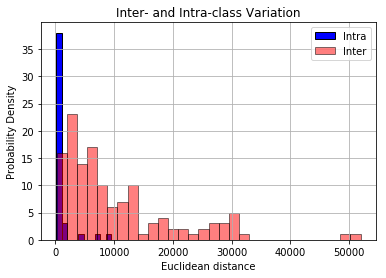

In [104]:
plt.figure(num=1)
plt.hist(IntraClass_Var_List, 10, alpha=1, label="Intra", edgecolor="black",color='b')
plt.hist(InterClass_Var_List, 30, alpha=0.5, label="Inter", edgecolor="black",color='r')
plt.legend(loc='upper right')
plt.title('Inter- and Intra-class Variation')
plt.xlabel("Euclidean distance")
plt.ylabel("Probability Density")
plt.grid(True)
plt.show()

In [105]:
list_class=[]
for i in range(44):
    list_class.append(i+1)

In [110]:
label_train = label_binarize(label_train, classes=list_class)
label_test=label_binarize(label_test, classes=list_class)

In [112]:
probs = knn.predict_proba(feature_test)

In [114]:
n_classes = label_train .shape[1]

In [117]:
# Compute FPR, TPR, and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(label_test[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

C:\Users\zhaoq\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [118]:
fpr["micro"], tpr["micro"], _ = roc_curve(label_test.ravel(), probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

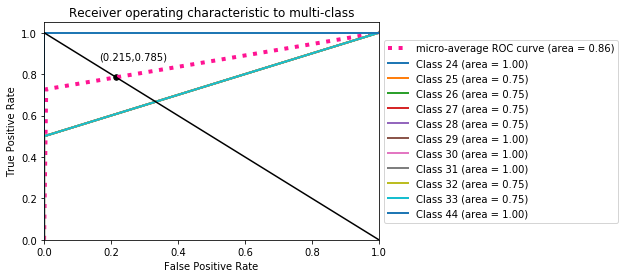

<Figure size 1440x720 with 0 Axes>

In [182]:
# Plot all ROC curves
lw=2
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

for i in range(n_classes):
    if roc_auc[i]>0.000001:
        plt.plot(fpr[i], tpr[i], lw=lw,
             label='Class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

        
plt.plot([1, 0], [0, 1],c='black')
plt.scatter([0.215], [1-0.215], s=30, color="black")  
plt.annotate("(0.215,0.785)",
             xy=(0.165, 0.87),       
             fontsize=10,         
             xycoords='data') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.figure(figsize=(20,10))
plt.show()

In [209]:
test_cmc = [] 
temp = np.cast['float32'](np.equal(label_test,predict))

In [210]:
test_cmc.append(np.mean(temp))

In [211]:
sort_index = np.argsort(-probs,axis=1)
sort_index=sort_index+1

In [215]:
for i in range(sort_index.shape[1]-1):
    for j in range(len(temp)):
        if temp[j]==0:
            predict[j] = sort_index[j][i+1]
    temp = np.cast['float32'](np.equal(label_test,predict))
    test_cmc.append(np.mean(temp)) 

Text(0.5, 1.0, 'CMC Curve')

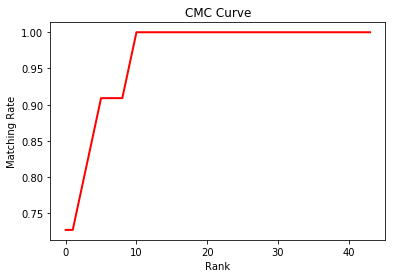

In [217]:
plt.figure()  
x = np.arange(0,sort_index.shape[1])  
plt.plot(x,test_cmc,color="red",linewidth=2)
plt.xlabel("Rank")  
plt.ylabel("Matching Rate") 
plt.title("CMC Curve")